In [ ]:
import numpy as np
import matplotlib.pyplot as plt

<font face="Times New Roman">
<!-- FandolSong -->

# Logistic Map

In [1]:
def logistic_map(r, x):
    return r * x * (1 - x)

def generate_bifurcation_diagram(r_values, x0, num_iterations, num_skip, map_func):
    bifurcation_diagram = []
    
    for r in r_values:
        x = x0
        
        # Skip a certain number of iterations to allow the system to reach a stable state
        for i in range(num_skip):
            x = map_func(r, x)
        
        # Store the subsequent iterations
        for i in range(num_iterations):
            x = map_func(r, x)
            bifurcation_diagram.append([r, x])
    
    return np.array(bifurcation_diagram)

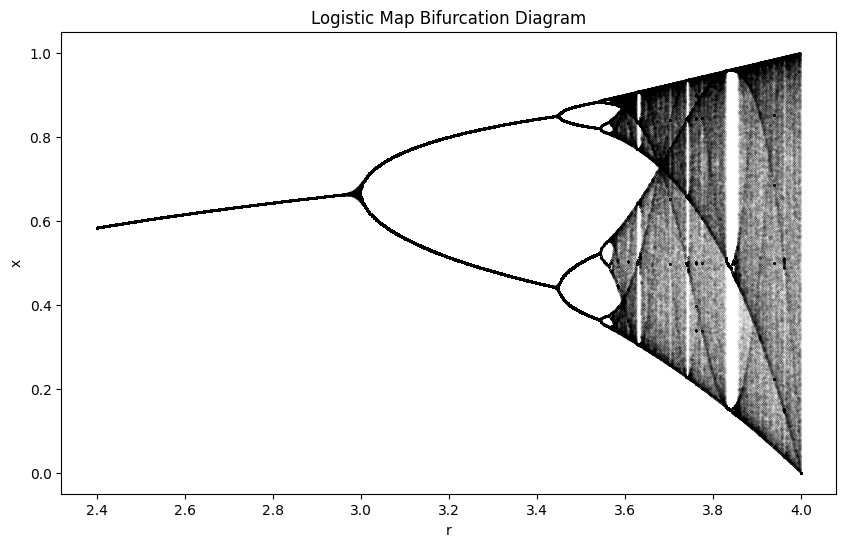

In [2]:
# Parameters
r_values = np.linspace(2.4, 4.0, 1000)  # Range of r values
x0 = 0.5  # Initial condition
num_iterations = 1000  # Number of iterations to generate for each r
num_skip = 100  # Number of iterations to skip initially

# Generate bifurcation diagram
bifurcation_data = generate_bifurcation_diagram(
    r_values, x0, num_iterations, 
    num_skip, logistic_map
)

# Plot the bifurcation diagram
plt.figure(figsize=(10, 6))
plt.scatter(bifurcation_data[:, 0], bifurcation_data[:, 1], s=0.001, c='k')
plt.xlabel('r')
plt.ylabel('x')
plt.title('Logistic Map Bifurcation Diagram')
plt.show()

<font face="Times New Roman">

### 10.4.5
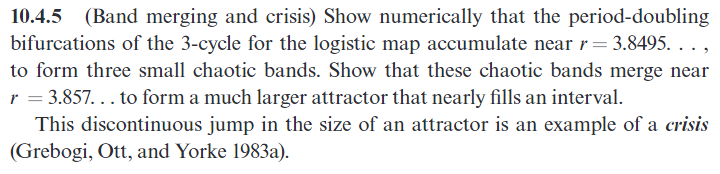

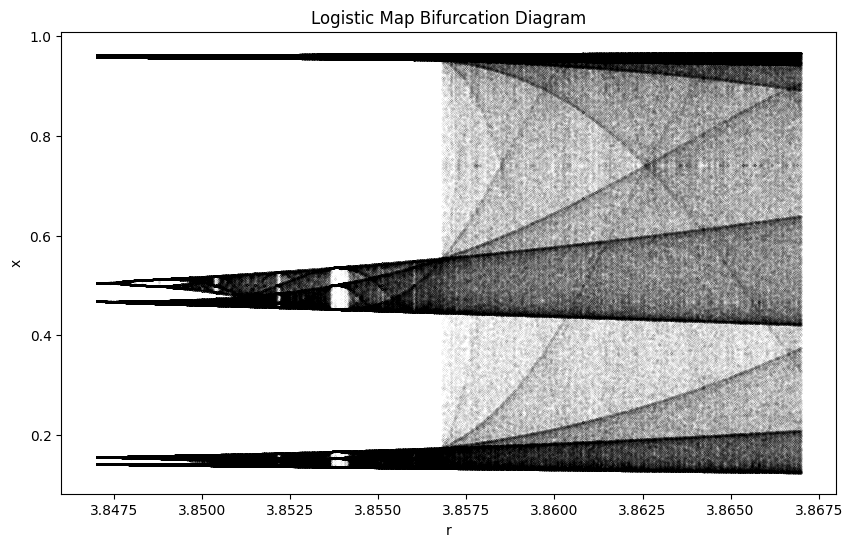

In [28]:
# Parameters
r_values = np.linspace(3.847, 3.867, 1000)  # Range of r values
x0 = 0.4  # Initial condition
num_iterations = 1000  # Number of iterations to generate for each r
num_skip = 100  # Number of iterations to skip initially

# Generate bifurcation diagram
bifurcation_data = generate_bifurcation_diagram(
    r_values, x0, num_iterations, 
    num_skip, logistic_map
)

# Plot the bifurcation diagram
plt.figure(figsize=(10, 6))
plt.scatter(bifurcation_data[:, 0], bifurcation_data[:, 1], s=0.001, c='k')
plt.xlabel('r')
plt.ylabel('x')
plt.title('Logistic Map Bifurcation Diagram')
plt.show()

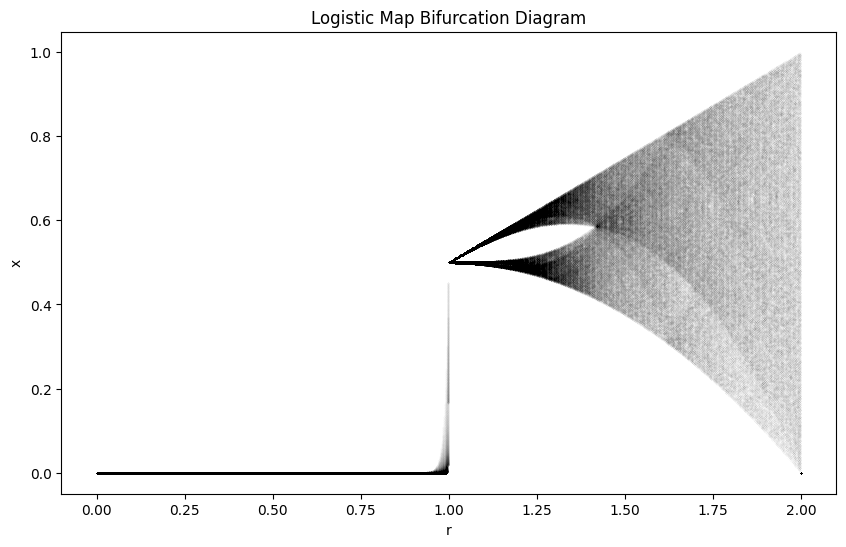

In [3]:
def tent_map(r, x):
    if 0 <= x <= 0.5:
        return r * x
    else:
        return r - r * x
    
# Parameters
r_values = np.linspace(0, 2.0, 1000)  # Range of r values
x0 = 0.5  # Initial condition
num_iterations = 1000  # Number of iterations to generate for each r
num_skip = 100  # Number of iterations to skip initially

# Generate bifurcation diagram
bifurcation_data = generate_bifurcation_diagram(
    r_values, x0, num_iterations, 
    num_skip, tent_map
)

# Plot the bifurcation diagram
plt.figure(figsize=(10, 6))
plt.scatter(bifurcation_data[:, 0], bifurcation_data[:, 1], s=0.0001, c='k')
plt.xlabel('r')
plt.ylabel('x')
plt.title('Logistic Map Bifurcation Diagram')
plt.show()

<font face="Times New Roman">

# Lyapunov Exponent

Text(0.5, 1.0, 'Lyapunov exponent of the logistic map')

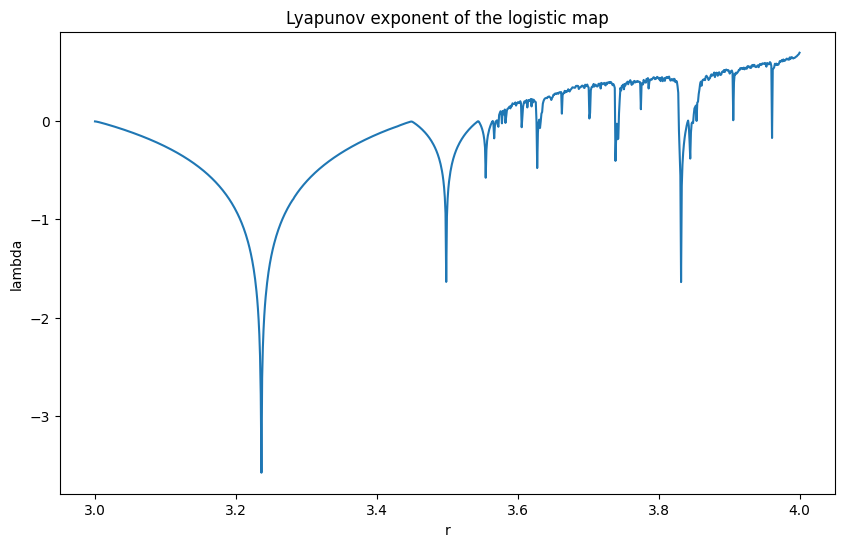

In [21]:
def deriv_logistic_map(r, x):
    return r * (1 - 2 * x)

# 计算logistic_map的Lyapunov指数
def lyapunov_exponent(r, x0, num_iterations, map_func, deriv_map_func):
    # Initialize the lyapunov sum
    sum = 0.0
    
    # Set the initial condition
    x = x0
    
    # Iterate the map and update the lyapunov sum
    for i in range(num_iterations):
        sum += np.log(abs(deriv_map_func(r, x)))
        x = map_func(r, x)
    
    # Return the average value of the lyapunov sum
    return sum / num_iterations

# Parameters
r_values = np.linspace(3.0, 4.0, 1000)  # Range of r values
x0 = 0.4  # Initial condition
num_iterations = 1000  # Number of iterations to generate for each r

# Calculate the Lyapunov exponent for each r value
lyapunov = [lyapunov_exponent(r, x0, num_iterations, logistic_map, deriv_logistic_map) for r in r_values]

# Plot the Lyapunov exponent
plt.figure(figsize=(10, 6))
plt.plot(r_values, lyapunov)
plt.xlabel('r')
plt.ylabel('lambda')
plt.title('Lyapunov exponent of the logistic map')

d:\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


Text(0.5, 1.0, 'Lyapunov exponent of the logistic map')

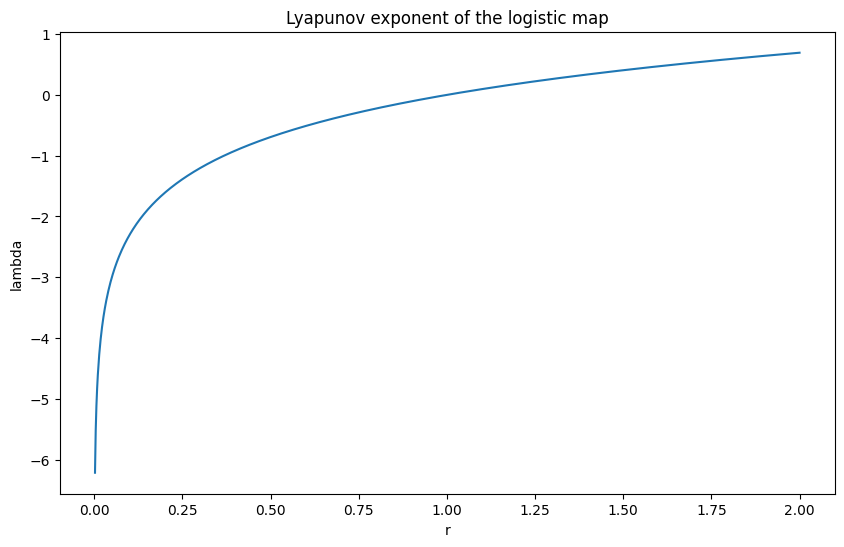

In [22]:
def deriv_tent_map(r, x):
    if 0 <= x <= 0.5:
        return r
    else:
        return -r
    
# Parameters
r_values = np.linspace(0, 2.0, 1000)  # Range of r values
x0 = 0.4  # Initial condition
num_iterations = 1000  # Number of iterations to generate for each r

# Calculate the Lyapunov exponent for each r value
lyapunov = [lyapunov_exponent(r, x0, num_iterations, tent_map, deriv_tent_map) for r in r_values]

# Plot the Lyapunov exponent
plt.figure(figsize=(10, 6))
plt.plot(r_values, lyapunov)
plt.xlabel('r')
plt.ylabel('lambda')
plt.title('Lyapunov exponent of the logistic map')